In [1]:
import numpy as np
import matplotlib.pyplot as plt
import useful_functions
import pickle
import copy
import random
from importlib import reload

In [2]:
reload(useful_functions)

<module 'useful_functions' from '/storage/git/ECE-4850/project3/useful_functions.py'>

In [3]:
key = np.array([' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])

In [4]:
text = useful_functions.convert_text_to_array('war_and_peace.txt')

with open('war_and_peace.pickle', 'wb') as file:
    pickle.dump(text, file)

In [5]:
with open('war_and_peace.pickle', 'rb') as file:
    text = pickle.load(file)

In [6]:
known_prob_array = useful_functions.find_probability_array(text)

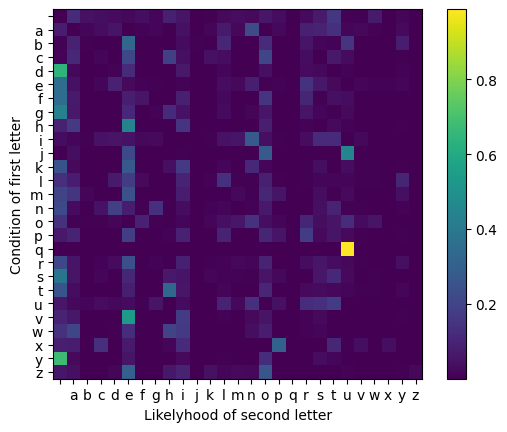

In [7]:
keyrange = np.arange(key.size)
plt.imshow(known_prob_array)
plt.xticks(keyrange, key)
plt.yticks(keyrange, key)
plt.ylabel("Condition of first letter")
plt.xlabel("Likelyhood of second letter")
plt.colorbar()
plt.show()

In [8]:
print(np.amax(known_prob_array))
print(np.amin(known_prob_array))
print(useful_functions.calculate_likelyhood(text, known_prob_array))

0.9881255301102629
1.767793281324855e-06
-7133276.045489735


In [39]:
unknown_text = useful_functions.convert_text_to_array('unknown.txt')

with open('unknown.pickle', 'wb') as file:
    pickle.dump(unknown_text, file)

In [10]:
with open('unknown.pickle', 'rb') as file:
    unknown_text = pickle.load(file)

In [25]:
unknown_prob_array = useful_functions.find_probability_array(unknown_text)
print(unknown_prob_array)
print(useful_functions.calculate_likelyhood(unknown_text, known_prob_array))

[[0.00568182 0.03977273 0.00568182 0.02272727 0.00568182 0.24431818
  0.00568182 0.05681818 0.07954545 0.10227273 0.00568182 0.00568182
  0.00568182 0.02272727 0.00568182 0.05681818 0.00568182 0.01136364
  0.05113636 0.08522727 0.00568182 0.00568182 0.14204545 0.00568182
  0.00568182 0.00568182 0.00568182]
 [0.01694915 0.01694915 0.01694915 0.01694915 0.01694915 0.01694915
  0.01694915 0.05084746 0.01694915 0.03389831 0.01694915 0.01694915
  0.06779661 0.01694915 0.01694915 0.01694915 0.01694915 0.01694915
  0.01694915 0.03389831 0.01694915 0.01694915 0.44067797 0.01694915
  0.01694915 0.01694915 0.01694915]
 [0.03225806 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806
  0.03225806 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806
  0.03225806 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806
  0.03225806 0.06451613 0.03225806 0.03225806 0.12903226 0.03225806
  0.03225806 0.03225806 0.03225806]
 [0.10769231 0.01538462 0.01538462 0.01538462 0.01538462 0.01538462
  0.1384

In [12]:
print(np.amax(unknown_prob_array))
print(np.amin(unknown_prob_array))

0.4406779661016949
0.002631578947368421


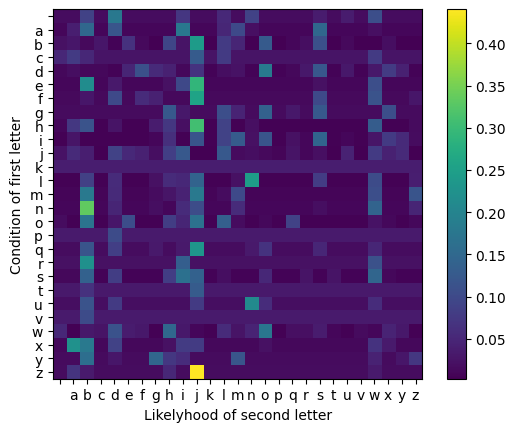

In [40]:
old_working_key = copy.copy(key)
new_text = copy.copy(unknown_text)
old_prob_array = useful_functions.find_probability_array(new_text)
best_key = copy.copy(key)
likelyhood_array = np.array([np.sum(old_prob_array)])
keyrange = np.arange(key.size)
plt.imshow(old_prob_array)
plt.xticks(keyrange, best_key)
plt.yticks(keyrange, best_key)
plt.ylabel("Condition of first letter")
plt.xlabel("Likelyhood of second letter")
plt.colorbar()
plt.show()

In [41]:
T = 2
T_stop = 0.000001
T_decimation = 0.999
T_counter = 0
T_loop_max = 50

while T > T_stop:
    # generate a new key by swapping a character
    working_key, swapped_chars = useful_functions.swap_char(old_working_key)
    # translate text
    new_text = useful_functions.swap_text(new_text, swapped_chars)
    working_prob_array = useful_functions.find_probability_array(new_text)
    # calculate the new likelyhood
    likelyhood = np.sum(np.abs(working_prob_array - old_prob_array))
    # if the likelyhood is more than the old likelyhood, assign it as the best and continue working with it
    if likelyhood < likelyhood_array[-1]:
        likelyhood_array = np.append(likelyhood_array, likelyhood)
        if likelyhood <= np.amin(likelyhood_array):
            print(likelyhood)
            best_key = copy.copy(working_key)
        old_working_key = copy.copy(working_key)
        old_prob_array = copy.copy(working_prob_array)
    # if the likelyhood is not more, perform our random chance moment,
    # if we pass, continue working with it but do not assign it as best
    # the original algorithm did not have a simulated annealing value, but I added one because it seemed like the professor wanted it
    elif (np.exp(-(likelyhood - likelyhood_array[-1])/T)) < random.uniform(0, 1):
        likelyhood_array = np.append(likelyhood_array, likelyhood)
        old_working_key = copy.copy(working_key)
        old_prob_array = copy.copy(working_prob_array)
    # this is just to swap the text back
    else:
        new_text = useful_functions.swap_text(new_text, swapped_chars)

    # here we check if it is time to cool down
    if T_counter >= T_loop_max:
        T_counter = 0
        T *= T_decimation
    else:
        T_counter += 1

1.7899779843832235
1.4752347198919904
1.352110916919126
0.5570888890117673
0.2761712710896013
0.27614364296416966
0.27192022201096605
0.27192022201096605
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966
0.271920222010966


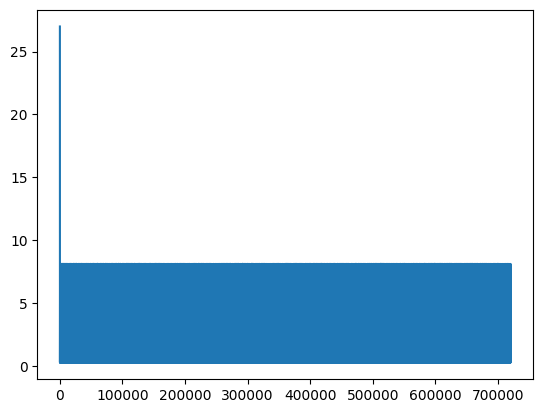

In [42]:
plt.plot(likelyhood_array)
plt.show()

In [43]:
print(best_key)
print(key)

['g' 'e' 'n' 'o' 's' 'b' 'l' 'j' 't' 'v' 'q' 'f' 'm' 'c' 'p' 'r' ' ' 'd'
 'y' 'w' 'x' 'i' 'h' 'z' 'a' 'k' 'u']
[' ' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q'
 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [44]:
with open('unknown.pickle', 'rb') as file:
    unknown_text = pickle.load(file)

translated_text = useful_functions.translate_text(unknown_text, best_key)
print(''.join(translated_text))

inqgsrtzbnwqmpnqtnevwvmzsrqslqtzdrvctqpvyzrdqvqtzaecnoqsrtmwvzrmqkvtnbqsrqsktnwyvmzsrtqslqrsztuqbvmvqjtzrdqvqljccuqkvuntzvrqwntjcmqvq szrmqbnrtzmuqlswqmpnqvkjrbvrntqmpnqtzaecnoqgsrtmwvzrnbqtzdrvcqztqntmvkcztpnbqmsqtengzlzvccuqvccsiqlswqmpnqvkjrbvrntqmsqknqtevwtnqmpztq szrmqbnrtzmuqztqnrbsinbqizmpqvqevwvanmnwqipzpqztqevwvanmnwzhnbqmsqnrsjwvdnqtevwtnrnttqjrczxnqwncvmnbqewnyzsjtqiswxqipzgpqbzbqrsmqtengzlzvccuqzaestnqmpnqtevwtzmuqvttjaemzsrqsynwvccqvqdzkktqtvaeczrdqlwvaniswxqztqntmvkcztpnbqlwsaqipzpqvccqevwvanmnwtqvrqknqcnvwrnbqvqanmwsescztqtvaeczrdqlwvaniswxqztqbnyncsenbqlswqmpnqvkjrbvrntqazomjwnqgsnllzgznrmtqipzgpqnoeczgzmcuqvrbqnllzznrmcuqwnewntnrmtqmpnqtevwtnrnttqlswqmpnqevwvanmnwqslqmpnqbzwzpcnmqbztmwzkjmzsrqdsynwrzrdqtevwtnrnttqmpnqestmnwzswqztqtpsirqmsqknqcstncuqveewsozavmnbqkuqvqdvaavqmpjtqmpnqnrmzwnqtnmqslqevwvanmnwtqvrqknqnllzgznrmcuqcnvwrnbqkuqtvaeczrdqinqsrtzbnwqmpnqtzdrvcqasbncqzrqipzpqksmpqvrbqvwnqmsqknqzbnrmzlznbqlwsaqrsztuqsktnwyvmzsrtqvrbqipnwnqnvpqztqbwvirqlwsaqvqewskvkzc

In [45]:
with open('unknown.pickle', 'rb') as file:
    unknown_text = pickle.load(file)

translated_text = useful_functions.other_translate_text(unknown_text, best_key)
print(''.join(translated_text))

zegpqcvsaedgfbegvexudufsqcgqkgvsjculvgbuoscjgugvstxlemgqcvfduscfgruveagqcgqrvedoufsqcvgqkgcqsvwgaufug vscjgugk llwgruwevsucgdev lfgugnqscfgaecvsfwgkqdgfbegur caucevgfbegvstxlemgpqcvfdusceagvsjculgsvgevfurlsvbeagfqgvxepsksullwgullqzgkqdgfbegur caucevgfqgregvxudvegfbsvgnqscfgaecvsfwgsvgecaqzeagzsfbgugxudutefedgzbsbgsvgxudutefedsieagfqgecq dujegvxudvecevvg clshegdelufeagxdeosq vgzqdhgzbspbgasagcqfgvxepsksullwgstxqvegfbegvxudvsfwguvv txfsqcgqoedullgugjsrrvgvutxlscjgkdutezqdhgsvgevfurlsvbeagkdqtgzbsbgullgxudutefedvgucgregleudceagugtefdqxqlsvgvutxlscjgkdutezqdhgsvgaeoelqxeagkqdgfbegur caucevgtsmf degpqekkspsecfvgzbspbgemxlspsflwgucagekkssecflwgdexdevecfvgfbegvxudvecevvgkqdgfbegxudutefedgqkgfbegasdsblefgasvfdsr fsqcgjqoedcscjgvxudvecevvgfbegxqvfedsqdgsvgvbqzcgfqgreglqvelwguxxdqmstufeagrwgugjuttugfb vgfbegecfsdegvefgqkgxudutefedvgucgregekkspsecflwgleudceagrwgvutxlscjgzegqcvsaedgfbegvsjculgtqaelgscgzbsbgrqfbgucagudegfqgregsaecfskseagkdqtgcqsvwgqrvedoufsqcvgucagzbedegeubgsvgaduzcgkdqtgugxdqrursl